<h3 style="color:dodgerblue">Import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [3]:
df = pd.read_csv(r"C:\Users\Ankit\DA Cetpa Project\Project1 EDA on Bangalore House Data\Bengaluru_House_Data.csv")

In [201]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
df.head(3)

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00


In [5]:
df.shape

(13320, 9)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [9]:
percent_null_value = df.isnull().sum()/df.shape[0]*100
percent_null_value

area_type        0.000000
availability     0.000000
location         0.007508
size             0.120120
society         41.306306
total_sqft       0.000000
bath             0.548048
balcony          4.572072
price            0.000000
dtype: float64

In [12]:
na_columns = percent_null_value[percent_null_value>0].index
na_columns

Index(['location', 'size', 'society', 'bath', 'balcony'], dtype='object')

<h4>Filling Object type columns

In [14]:
object_columns = df.select_dtypes(include='object').columns
object_columns

Index(['area_type', 'availability', 'location', 'size', 'society',
       'total_sqft'],
      dtype='object')

In [15]:
na_object_col = []
for i in na_columns:
    for j in object_columns:
        if i==j:
            na_object_col.append(i)
na_object_col            

['location', 'size', 'society']

In [19]:
for i in na_object_col:
    df[i].fillna(df[i].mode()[0],inplace=True)

In [20]:
df.isnull().sum()

area_type         0
availability      0
location          0
size              0
society           0
total_sqft        0
bath             73
balcony         609
price             0
dtype: int64

<h4>Filling numerical columns

In [21]:
num_col = df.select_dtypes(include=['int64','float64']).columns
num_col

Index(['bath', 'balcony', 'price'], dtype='object')

In [22]:
na_num_col = []
for i in num_col:
    for j in na_columns:
        if i==j:
            na_num_col.append(i) 
na_num_col            

['bath', 'balcony']

In [25]:
for i in na_num_col:
    df[i].fillna(method='bfill',inplace=True)

In [26]:
df.isnull().sum()

area_type       0
availability    0
location        0
size            0
society         0
total_sqft      0
bath            0
balcony         0
price           0
dtype: int64

<AxesSubplot:>

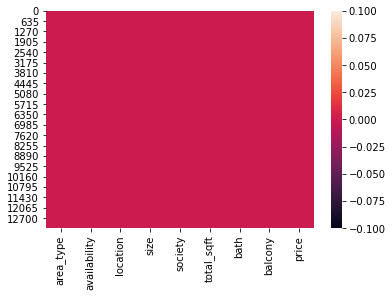

In [27]:
sns.heatmap(df.isnull())

<h3> Now we have clean our data , lets do EDA on dataset

In [28]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,GrrvaGr,1200,2.0,1.0,51.00


In [29]:
df['availability'].unique()

array(['19-Dec', 'Ready To Move', '18-May', '18-Feb', '18-Nov', '20-Dec',
       '17-Oct', '21-Dec', '19-Sep', '20-Sep', '18-Mar', '20-Feb',
       '18-Apr', '20-Aug', '18-Oct', '19-Mar', '17-Sep', '18-Dec',
       '17-Aug', '19-Apr', '18-Jun', '22-Dec', '22-Jan', '18-Aug',
       '19-Jan', '17-Jul', '18-Jul', '21-Jun', '20-May', '19-Aug',
       '18-Sep', '17-May', '17-Jun', '21-May', '18-Jan', '20-Mar',
       '17-Dec', '16-Mar', '19-Jun', '22-Jun', '19-Jul', '21-Feb',
       'Immediate Possession', '19-May', '17-Nov', '20-Oct', '20-Jun',
       '19-Feb', '21-Oct', '21-Jan', '17-Mar', '17-Apr', '22-May',
       '19-Oct', '21-Jul', '21-Nov', '21-Mar', '16-Dec', '22-Mar',
       '20-Jan', '21-Sep', '21-Aug', '14-Nov', '19-Nov', '15-Nov',
       '16-Jul', '15-Jun', '17-Feb', '20-Nov', '20-Jul', '16-Sep',
       '15-Oct', '15-Dec', '16-Oct', '22-Nov', '15-Aug', '17-Jan',
       '16-Nov', '20-Apr', '16-Jan', '14-Jul'], dtype=object)

In [33]:
df['area_type'].unique()

array(['Super built-up  Area', 'Plot  Area', 'Built-up  Area',
       'Carpet  Area'], dtype=object)

In [34]:
df['location'].unique()

array(['Electronic City Phase II', 'Chikka Tirupathi', 'Uttarahalli', ...,
       '12th cross srinivas nagar banshankari 3rd stage',
       'Havanur extension', 'Abshot Layout'], dtype=object)

In [35]:
df['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [81]:
df['society'].unique()

array(['Coomee ', 'Theanmp', 'GrrvaGr', ..., 'SJovest', 'ThhtsV ',
       'RSntsAp'], dtype=object)

In [95]:
df.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,GrrvaGr,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,GrrvaGr,1200,2.0,1.0,51.00


<h2 style="color:purple">Questions:

<h3 style="color:tomato">1.Which area have max no. of balcony?

In [83]:
df[df['balcony'] == df['balcony'].max()]['area_type'].unique()

array(['Plot  Area', 'Built-up  Area', 'Super built-up  Area',
       'Carpet  Area'], dtype=object)

<h4 style="color:dodgerblue">Ans: Every area have almost 3 balconies which is maximum

<h3 style="color:tomato">2.Which price range have more than 2 bathroom and 2 balcony?

In [87]:
df[(df['bath'] > 2) & (df['balcony'] > 2)]['price']
min_price = df[(df['bath'] > 2) & (df['balcony'] > 2)]['price'].min()
max_price = df[(df['bath'] > 2) & (df['balcony'] > 2)]['price'].max()

In [92]:
print("Price range of house having more than 2 bathrooms and 2 balcony starts from Rs.",min_price,"to Rs.",max_price)

Price range of house having more than 2 bathrooms and 2 balcony starts from Rs. 23.0 to Rs. 2800.0


<h4 style="color:dodgerblue">Ans: Price range of house having more than 2 bathrooms and 2 balcony starts from Rs. 23.0 to Rs. 2800.0

<h3 style="color:tomato">3.Which society have best location?

In [97]:
society = df.groupby(by='society').mean()
society

,bath,balcony,price
society,,,
3Codeli,2.000000,2.000000,58.500000
7 ise P,2.000000,1.000000,50.000000
A idse,2.000000,2.000000,50.000000
A rtsai,2.000000,1.000000,73.000000
ACersd,2.000000,2.000000,115.000000
...,...,...,...
Zonce E,3.500000,2.000000,98.750000
Zostaa,2.000000,1.000000,62.000000
i1ncyRe,2.000000,2.000000,50.000000


In [124]:
final = society[(society['bath'] == society['bath'].median()) &
                (society['balcony'] == society['balcony'].median()) & (society['price'] < society['price'].median())]

best_society = final[final['price'] == final['price'].min()].index[0]
final[final['price'] == final['price'].min()]

,bath,balcony,price
society,,,
AVeldun,2.0,2.0,8.44


In [125]:
print(best_society,"society has best location which have 2 bath , 2 balcony and 2bhk in only Rs.8.44")

AVeldun society has best location which have 2 bath , 2 balcony and 2bhk in only Rs.8.44


<h4 style="color:dodgerblue">Ans: AVeldun society has best location which have 2 bath , 2 balcony and 2bhk in only Rs.8.44

<h3 style="color:tomato">4.Which area have minimum number of balcony but price range is maximum?

In [140]:
min_balcony = df[df['balcony'] == df['balcony'].min()+1][['area_type','price']]
min_balcony_max_price_series = min_balcony[min_balcony['price'] == min_balcony['price'].max()]['area_type']
min_balcony_max_price = min_balcony_max_price_series.values[0]
print(min_balcony_max_price,'has highest price with minimum balcony')

Plot  Area has highest price with minimum balcony


<h4 style="color:dodgerblue">Ans: Plot  Area has highest price with minimum balcony

<h3 style="color:tomato">5.Which area have minimum price but highest number of balcony?

In [151]:
max_balcony = df[df['balcony'] == df['balcony'].max()][['area_type','price']]
max_balcony_min_price_series = max_balcony[max_balcony['price'] == max_balcony['price'].min()]['area_type']
max_balcony_min_price = max_balcony_min_price_series.values[0]
print(max_balcony_min_price,'has minimum price with maximum balcony')

Plot  Area has minimum price with maximum balcony


<h4 style="color:dodgerblue">Ans: Plot  Area has minimum price with maximum balcony

<h3 style="color:tomato">6.Which area have lowest number of bathroom?

In [158]:
area_with_min_bath = df[df['bath'] == df['bath'].min()]['area_type'].unique()
print("Areas with minimum bathroom are:")
for i,var in enumerate(area_with_min_bath):
    print(i+1,var,sep=".")

Areas with minimum bathroom are:
1.Built-up  Area
2.Super built-up  Area
3.Plot  Area
4.Carpet  Area


<pre><h4 style="color:dodgerblue">Ans: 
Areas with minimum bathroom are:
    1.Built-up  Area
    2.Super built-up  Area
    3.Plot  Area
    4.Carpet  Area

<h3 style="color:tomato">7.What is price range of 2bhk with balcony?

In [190]:
df[(df['balcony'] > 1) & (df['size']=='2 BHK')]['price']
min_price_with_balcony = df[(df['balcony'] > 1) & (df['size']=='2 BHK')]['price'].min() 
max_price_with_balcony = df[(df['balcony'] > 1) & (df['size']=='2 BHK')]['price'].max()
print("Price range of 2 bhk house with balcony is Rs.",min_price_with_balcony,"lac to Rs.",max_price_with_balcony,'lac')

Price range of 2 bhk house with balcony is Rs. 8.44 lac to Rs. 475.0 lac


<h4 style="color:dodgerblue">Ans: Price range of 2 bhk house with balcony is Rs. 8.44 to Rs. 475.0

<h3 style="color:tomato">8.What is price  of 2bhk house in whitfeild area?

In [191]:
whitefiled_price_3bhk = df[(df['location'] == 'whitefiled') & (df['size']=='2 BHK')]['price']
price_2bhk_whitefiled = whitefiled_price_3bhk.values[0]
print("Price of 2bhk in whitefiled is",price_2bhk_whitefiled)

Price of 2bhk in whitefiled is 32.73


<h4 style="color:dodgerblue">Ans: Price of 2 bhk house in whitefiled location is Rs.32.73

<h3 style="color:tomato">9.What is the average cost of living in Bengaluru?

In [192]:
averge_price = df['price'].mean()
print("Average price of living in Bengalore is",averge_price)

Average price of living in Bengalore is 112.56562650150138


<h4 style="color:dodgerblue">Ans: Average price of living in Bengalore is 112.56562650150138

<h3 style="color:tomato">10.What is minimum and maximum budget one should have to buy 2bhk or 3bhk in bengaluru?

In [199]:
df[(df['size'] == '2 BHK') | (df['size']=='3 BHK')]['price']
min_price_2_3_bhk = df[(df['size'] == '2 BHK') | (df['size']=='3 BHK')]['price'].min()
max_price_2_3_bhk = df[(df['size'] == '2 BHK') | (df['size']=='3 BHK')]['price'].max()
print("Minimum price for 2bhk or 3bhk house to buy is",min_price_2_3_bhk)
print("Maximum price for 2bhk or 3bhk house to buy is",max_price_2_3_bhk)

Minimum price for 2bhk or 3bhk house to buy is 8.44
Maximum price for 2bhk or 3bhk house to buy is 1015.0


<pre><h4 style="color:dodgerblue">Ans: 
Minimum price for 2bhk or 3bhk house to buy is 8.44
Maximum price for 2bhk or 3bhk house to buy is 1015.0

<h3 style="color:tomato">11.What will be the budget one should have who want atleast 3 bathroom , 2 balcony in location Electronic phase II? 

In [212]:
df[(df['location'] == 'Electronic City Phase II') & (df['bath']>=3) & (df['balcony']>=2)]['price']
min_price_e_phase2 = df[(df['location'] == 'Electronic City Phase II') & (df['bath']>=3) & (df['balcony']>=2)]['price'].min()
max_price_e_phase2 = df[(df['location'] == 'Electronic City Phase II') & (df['bath']>=3) & (df['balcony']>=2)]['price'].max()
print("To buy a house in Electronic City Phase II having atleast 3 bahroom and 2 balcony , one should have bidget from Rs.",min_price_e_phase2,"to Rs.",max_price_e_phase2)

To buy a house in Electronic City Phase II having atleast 3 bahroom and 2 balcony , one should have bidget from Rs. 46.0 to Rs. 116.0


<pre><h4 style="color:dodgerblue">Ans: To buy a house in Electronic City Phase II having atleast 3 bahroom and 2 balcony , 
one should have bidget from Rs. 46.0 to Rs. 116.0
